# EDA - Bivariate Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import httpimport

from pathlib import Path
from scipy.stats import chi2_contingency

In [3]:
# Import personal library
with httpimport.github_repo("junclemente", "jcds", ref="master"):
    import jcds.eda as jq

In [4]:
datasets = Path("../datasets")
full_df = pd.read_csv(datasets / "school_clean.csv")
full_df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,0.0
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,0.0
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,0.0


Since the goal is to determine which students have the highest chance of being placed, the project will focus on data that would be available during admissions. 

The columns are ['Undergrad Degree', 'Undergrad Grade', 'Work Experience', 'Employability (Before), 'Status'].

In [5]:
# Set global color palette
global_color = "colorblind"
# Set global color for Seaborn
sns.set_palette(global_color)
# Set global color palette for Matplotlib
colors = sns.color_palette(global_color)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

## Pair Plot Visualization

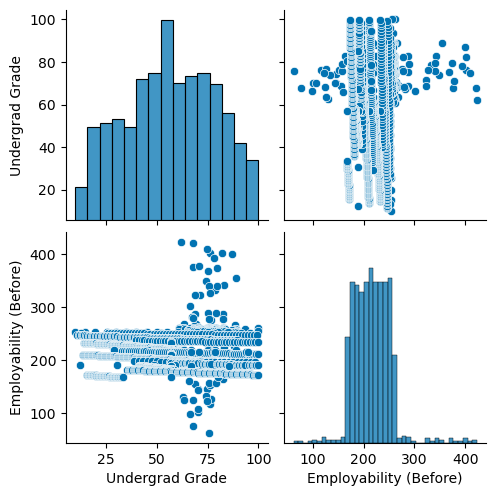

In [6]:
sns.pairplot(df)
plt.show()

There appears to be a high correlation between MBA and Undergrad grade.

In [10]:
# Calculate correlation of Undergrad and MBA grade
mba_undergrad_corr = df["Undergrad Grade"].corr(df["MBA Grade"])
print(f"Correlation between MBA and Undergrad grade: {mba_undergrad_corr}.")

Correlation between MBA and Undergrad grade: 0.9054506144687762.


Based on the pair plot chart, there appears to be high correlation between MBA and Undergrad grades. 
Since correlation between MBA and Undergrad grade is > |.7|, there is high correlation between these two variables. 

## Work Experience vs Status

In [16]:
undergrad_contingency = pd.crosstab(df['Undergrad Degree'], df['Status'])
print(undergrad_contingency)

chi2, p, dof, expected = chi2_contingency(undergrad_contingency)
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")

Status            Not Placed  Placed
Undergrad Degree                    
Art                      224       6
Business                  17     240
Computer Science           9     231
Engineering              230       9
Finance                    4     230
Chi-Square value: 1021.4286957111007
P-value: 8.102228587883412e-220


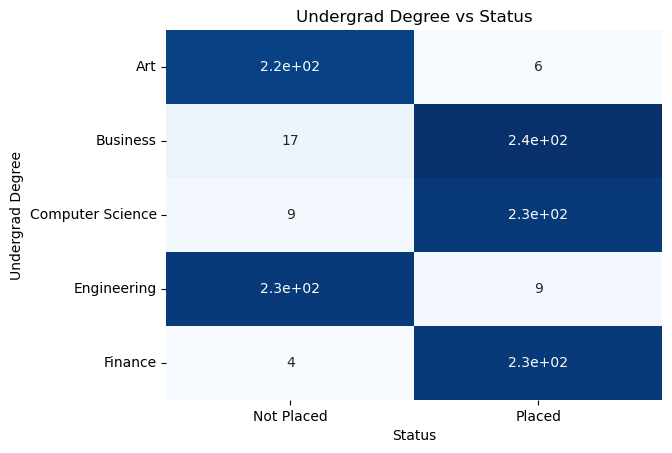

In [17]:
sns.heatmap(undergrad_contingency, annot=True, cmap="Blues", cbar=False)
plt.title("Undergrad Degree vs Status")
plt.xlabel('Status')
plt.ylabel('Undergrad Degree')
plt.show()

## Work Experience vs Status

In [ ]:
crosstab = pd.crosstab(df["Status"], df["Work Experience"])
display(crosstab)

In [ ]:
plt.figure(figsize=(8, 5))

# Plot the bars manually for 'No' and 'Yes' work experience
bars1 = plt.bar(
    crosstab.index, crosstab["No"], label="No Work Experience", color="#1f77b4"
)
bars2 = plt.bar(
    crosstab.index,
    crosstab["Yes"],
    bottom=crosstab["No"],
    label="Yes Work Experience",
    color="#ff7f0e",
)

# Add number counts on top of each bar for 'No Work Experience'
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height - 30,
        "%d" % int(height),
        ha="center",
        color="white",
        fontweight="bold",
    )

# Add number counts on top of each bar for 'Yes Work Experience'
for bar in bars2:
    height = bar.get_height() + bar.get_y()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 10,
        "%d" % int(height),
        ha="center",
        color="black",
        fontweight="bold",
    )

# Add labels and title
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Stacked Bar Chart: Work Experience vs Status After Graduation")
plt.legend()

# Show the plot
plt.show()

Chart shows that students were more employable after graduation. 